In [37]:
import pickle
import glob, os
import numpy as np
from rewards.properties import qed as mol_qed, drd2 as mol_drd2, logP as mol_logP
from coma.properties import penalized_logp
from rdkit import Chem
import tqdm
import networkx as nx
from rdkit.Chem import Descriptors
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect

def qed(smile):
    return mol_qed(Chem.MolFromSmiles(smile))

def drd2(smile):
    return mol_drd2(Chem.MolFromSmiles(smile))

def logP(smile):
    return mol_logP(Chem.MolFromSmiles(smile))

mfs = Chem.MolFromSmiles

In [38]:
x = pickle.load(open("results/eval_on_coma_sorafenib/0.pickle", 'rb'))

In [39]:
target = "CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC(=C(C=C3)Cl)C(F)(F)F"

In [40]:
all_keys = np.array(list(x["sim"].keys()))
sim = np.vectorize(x["sim"].get)(all_keys)

In [60]:
all_keys[(sim>0.4)]

array(['1_4', '4_0', '4_1', ..., '49_2_3_2_1_2_2', '49_0_3_4_4_2_4',
       '23_1_4_4_2_2_2'], dtype='<U14')

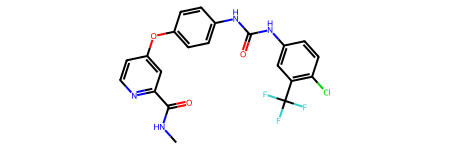

In [61]:
mfs(target)

In [62]:
from IPython.display import display

In [64]:
smiles = np.vectorize(x["traj"].get)(all_keys[sim > 0.4])
len(smiles)

24290

In [76]:
smiles = np.unique(smiles)
smiles.shape

(19101,)

# DEEPPURPOSE

In [77]:
sorafenib = "CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC(=C(C=C3)Cl)C(F)(F)F"

sorafenib_target = '''MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRVKLKSGFLPCRKPVEKEILSNINGI
MKPGLNAILGPTGGGKSSLLDVLAARKDPSGLSGDVLINGAPRPANFKCNSGYVVQDDVVMGTLTVRENL
QFSAALRLATTMTNHEKNERINRVIQELGLDKVADSKVGTQFIRGVSGGERKRTSIGMELITDPSILFLD
EPTTGLDSSTANAVLLLLKRMSKQGRTIIFSIHQPRYSIFKLFDSLTLLASGRLMFHGPAQEALGYFESA
GYHCEAYNNPADFFLDIINGDSTAVALNREEDFKATEIIEPSKQDKPLIEKLAEIYVNSSFYKETKAELH
QLSGGEKKKKITVFKEISYTTSFCHQLRWVSKRSFKNLLGNPQASIAQIIVTVVLGLVIGAIYFGLKNDS
TGIQNRAGVLFFLTTNQCFSSVSAVELFVVEKKLFIHEYISGYYRVSSYFLGKLLSDLLPMRMLPSIIFT
CIVYFMLGLKPKADAFFVMMFTLMMVAYSASSMALAIAAGQSVVSVATLLMTICFVFMMVCWSISQPLHL
GCHGFSTSAFHDMDLRLCSIMNFWDKTSAQDSMQQETILVTMQHVLAKNIW'''

sorafenib_target = sorafenib_target.replace('\n', '')

In [78]:
from DeepPurpose import DTI as models 
from DeepPurpose import utils, dataset

In [79]:
# path = utils.download_pretrained_model('Morgan_AAC_DAVIS')
net = models.model_pretrained(path_dir="save_folder/pretrained_models/DeepPurpose_BindingDB/model_MPNN_CNN/")

In [80]:
# FOR SORAFENIB

models.virtual_screening(    
    np.array([sorafenib]),
    np.array([sorafenib_target]),
    model=net,
    convert_y=False,
)

virtual screening...
Drug Target Interaction Prediction Mode...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
Virtual Screening Result
+------+-----------+-------------+---------------+
| Rank | Drug Name | Target Name | Binding Score |
+------+-----------+-------------+---------------+
|  1   |   Drug 0  |   Target 0  |      4.99     |
+------+-----------+-------------+---------------+


[4.9932966232299805]

In [81]:
# FOR OUR DRUGS

results = models.virtual_screening(    
    smiles,
    np.array([sorafenib_target]*smiles.shape[0]), 
    model=net,
    convert_y=False,
)

virtual screening...
Drug Target Interaction Prediction Mode...
in total: 19101 drug-target pairs
encoding drug...
unique drugs: 19101
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
Virtual Screening Result
+-------+------------+--------------+---------------+
|  Rank | Drug Name  | Target Name  | Binding Score |
+-------+------------+--------------+---------------+
|   1   |  Drug 722  |  Target 722  |     21.95     |
|   2   | Drug 6565  | Target 6565  |     21.56     |
|   3   | Drug 2824  | Target 2824  |     21.10     |
|   4   | Drug 2274  | Target 2274  |     20.72     |
|   5   | Drug 13500 | Target 13500 |     20.54     |
|   6   | Drug 1117  | Target 1117  |     20.35     |
|   7   | Drug 1126  | Target 1126  |     19.78     |
|   8   | Drug 16585 | Target 16585 |     18.72     |
|   9   | Drug 2794  | Target 2794  |     18.39     |
|   10  | Drug 16409 | Target 16409 |     18.31     |
checkout ./result/virtual_screening.txt for the whole li

In [85]:
results = np.array(results)
print("Success ratio = ", (results < 4.7).sum() / all_keys.shape[0])
print("Success ratio = ", (results < 4.7).sum() / results.shape[0])

Success ratio =  0.014958136148525664
Success ratio =  0.43023925448929373


In [95]:
all_keys.shape[0]

549400

In [88]:
import seaborn as sns

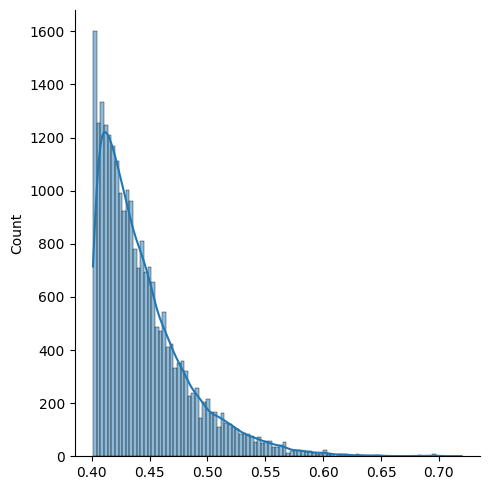

In [94]:
sns.displot(sim[sim>0.4], kde=True)

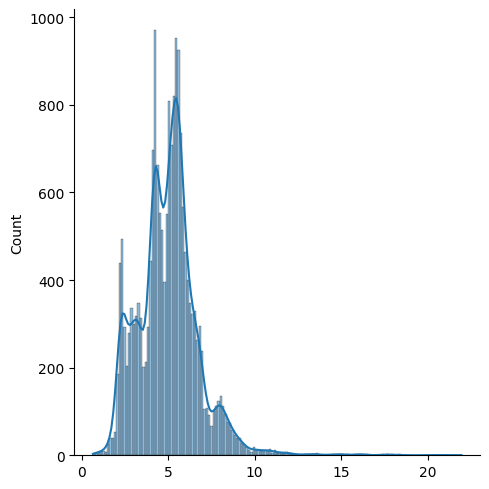

In [91]:
sns.displot(results, kde=True)